# Aerator Imports to Ecuador 2021-2024

2025-06-03 16:13:15,939 - INFO - Starting full analysis pipeline
2025-06-03 16:13:15,939 - INFO - Starting data loading process
2025-06-03 16:13:15,940 - INFO - Loading data files from ../../data/raw/aquaculture/aerator_imports
2025-06-03 16:13:15,952 - INFO - Loaded 2021_aerators: 463 rows × 58 columns
2025-06-03 16:13:15,966 - INFO - Loaded 2022_aerators: 571 rows × 60 columns
2025-06-03 16:13:15,975 - INFO - Loaded 2023_aerators: 365 rows × 60 columns
2025-06-03 16:13:15,986 - INFO - Loaded 2024_aerators: 365 rows × 60 columns
2025-06-03 16:13:15,986 - INFO - Starting data processing pipeline
2025-06-03 16:13:15,987 - INFO - Found 54 common columns across all datasets
2025-06-03 16:13:15,994 - INFO - Combined dataset: 1764 rows × 54 columns
2025-06-03 16:13:15,995 - INFO - Starting full data cleaning pipeline
2025-06-03 16:13:16,009 - INFO - Converted 5 date columns
2025-06-03 16:13:16,012 - INFO - Column translation skipped (using original Spanish names)
2025-06-03 16:13:16,016 - I

🔄 Aerator Data Analysis - Modular Version


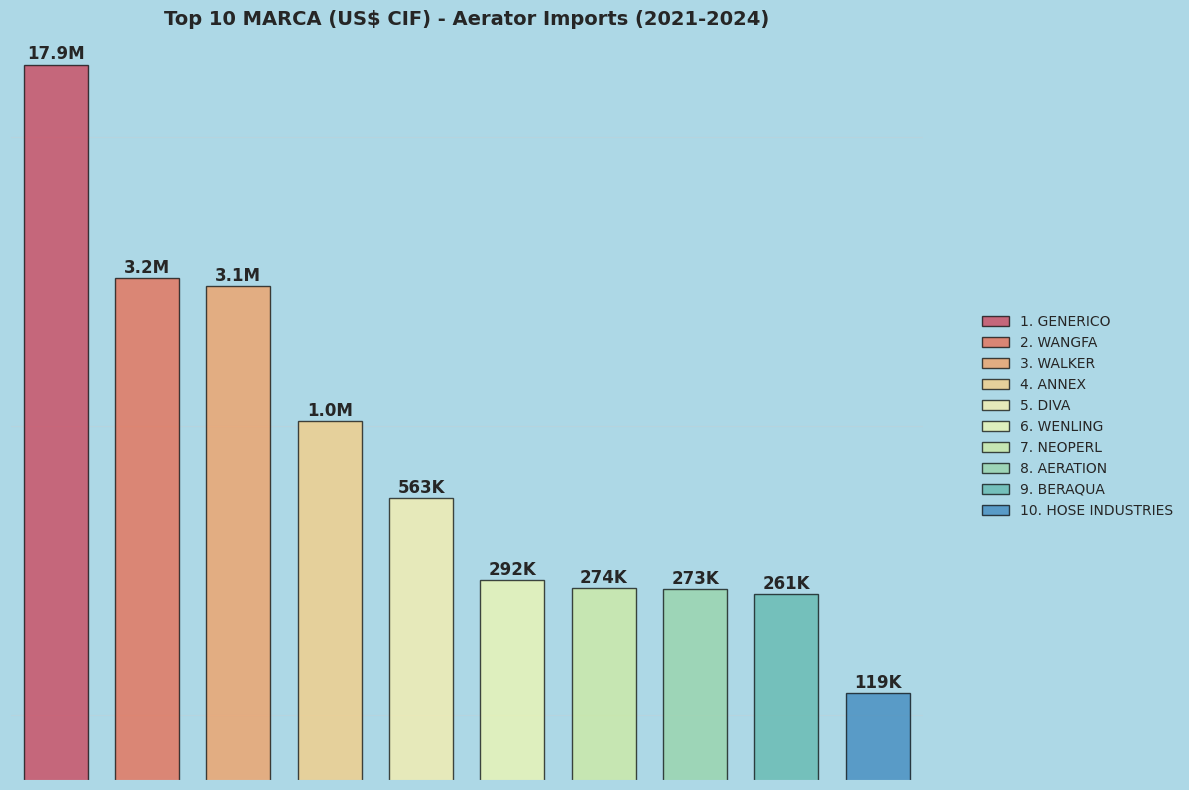

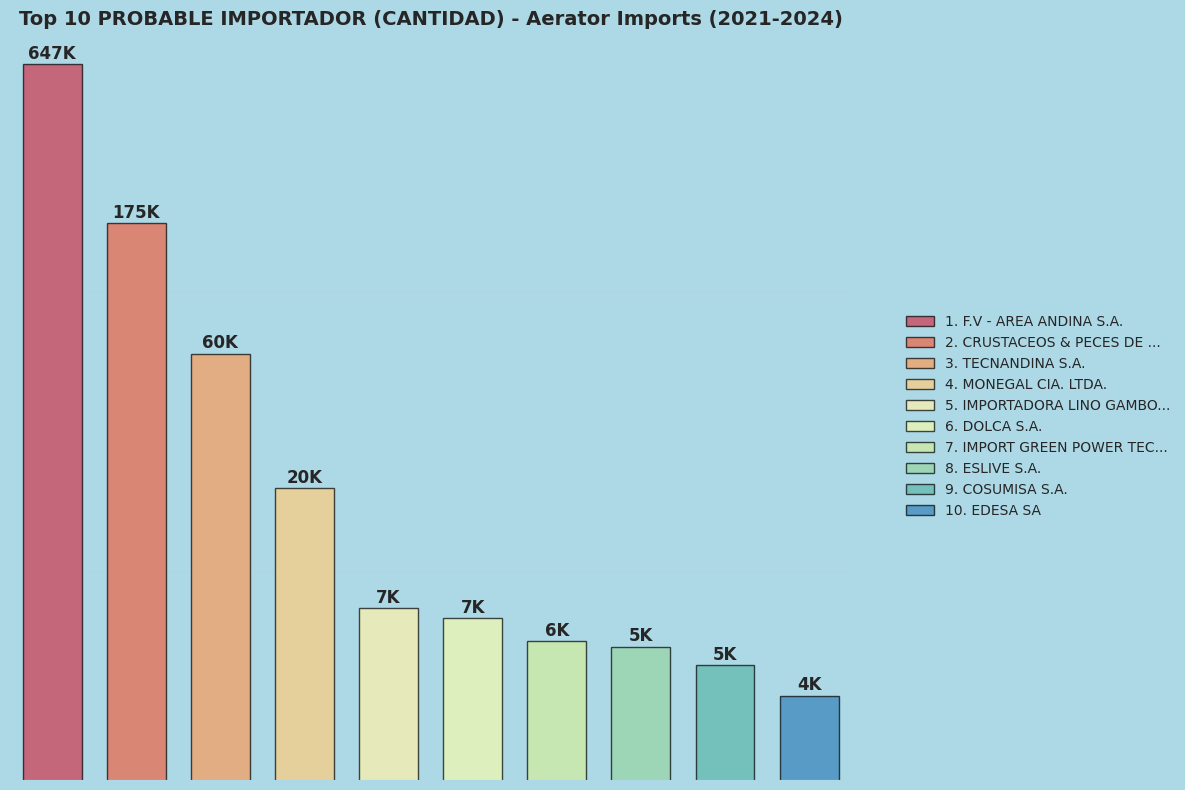

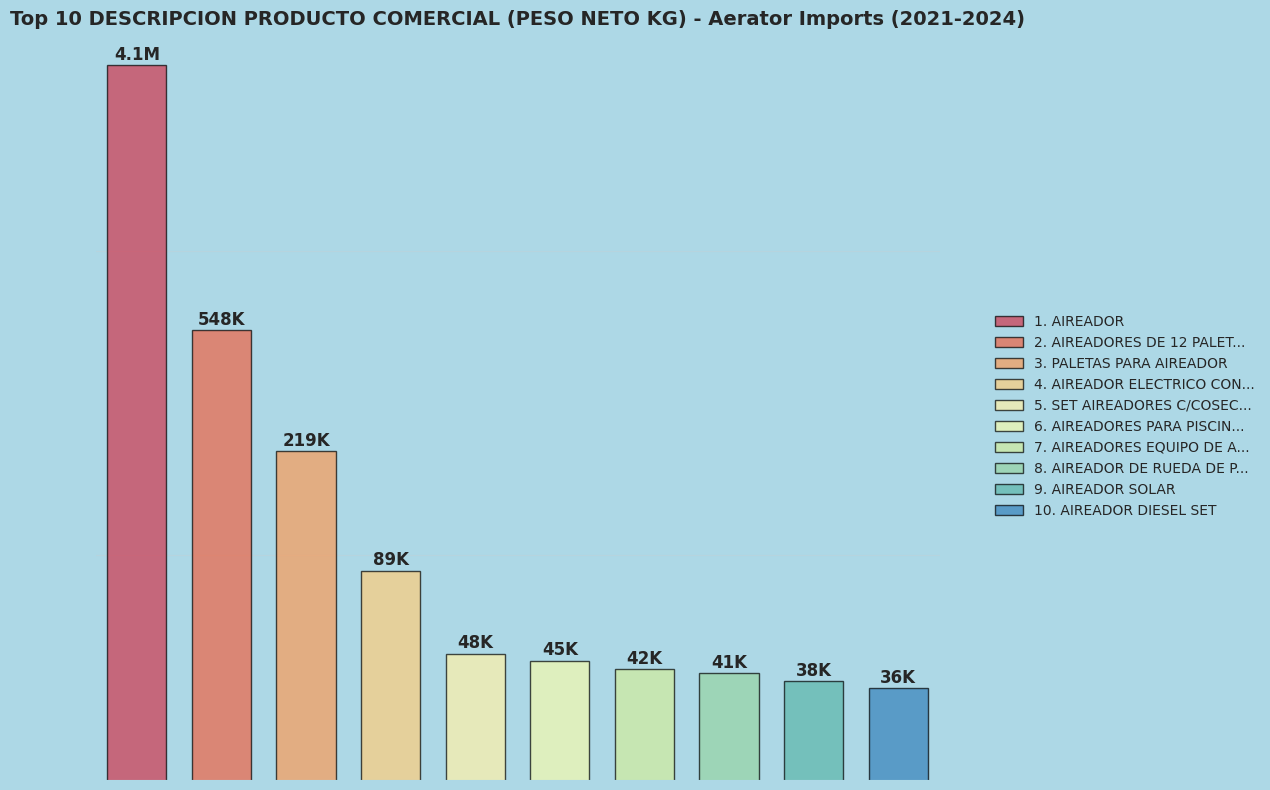

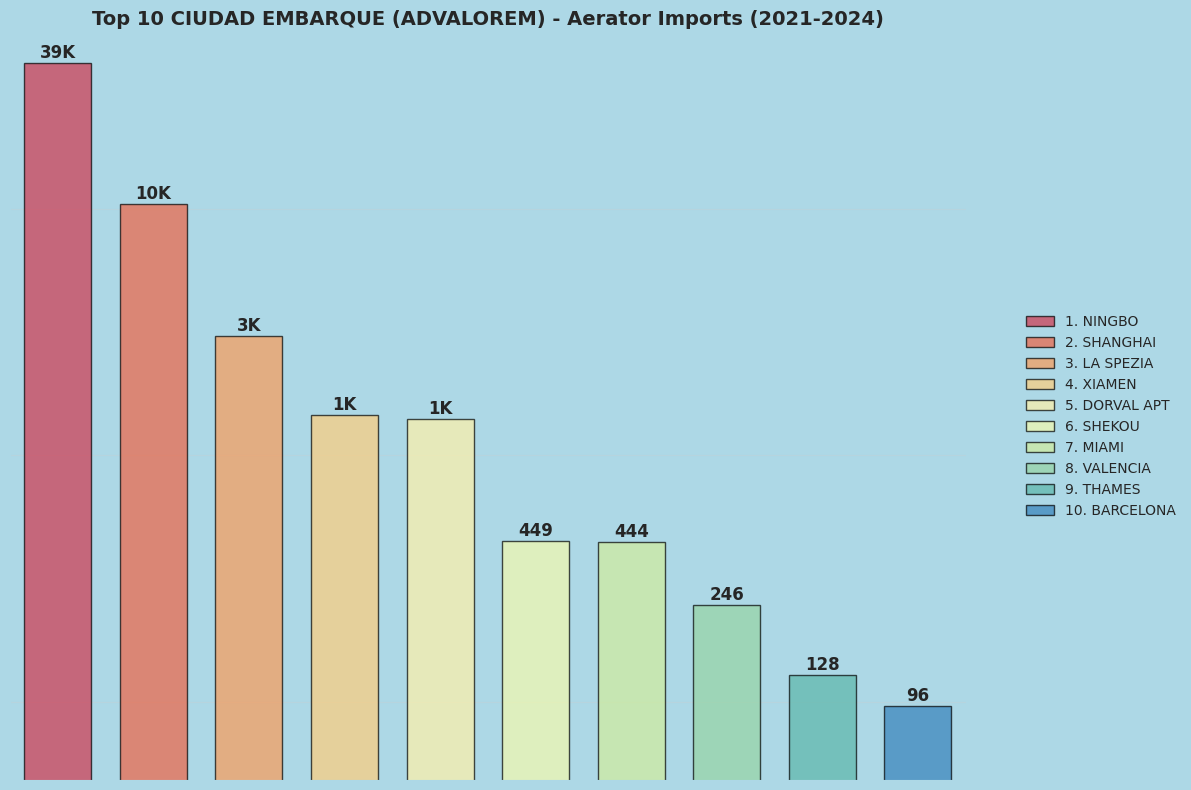

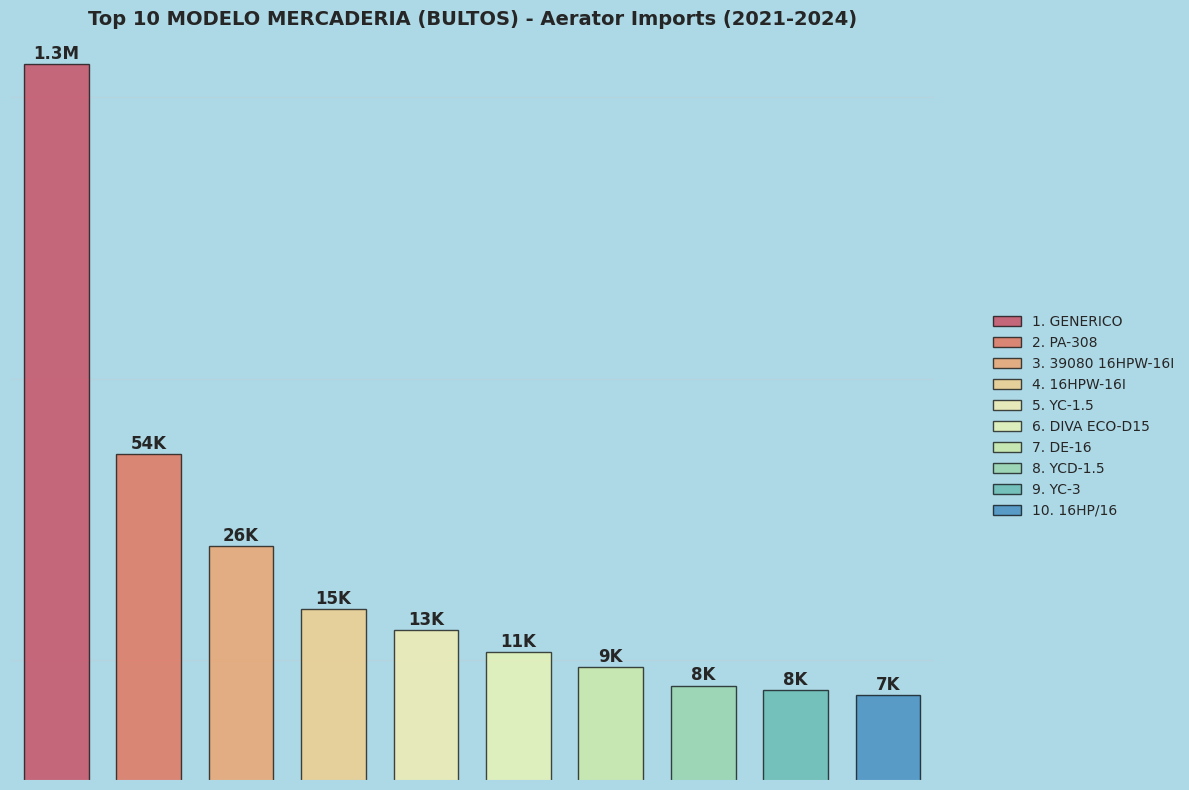

/tmp/ipykernel_138149/577728313.py:518: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


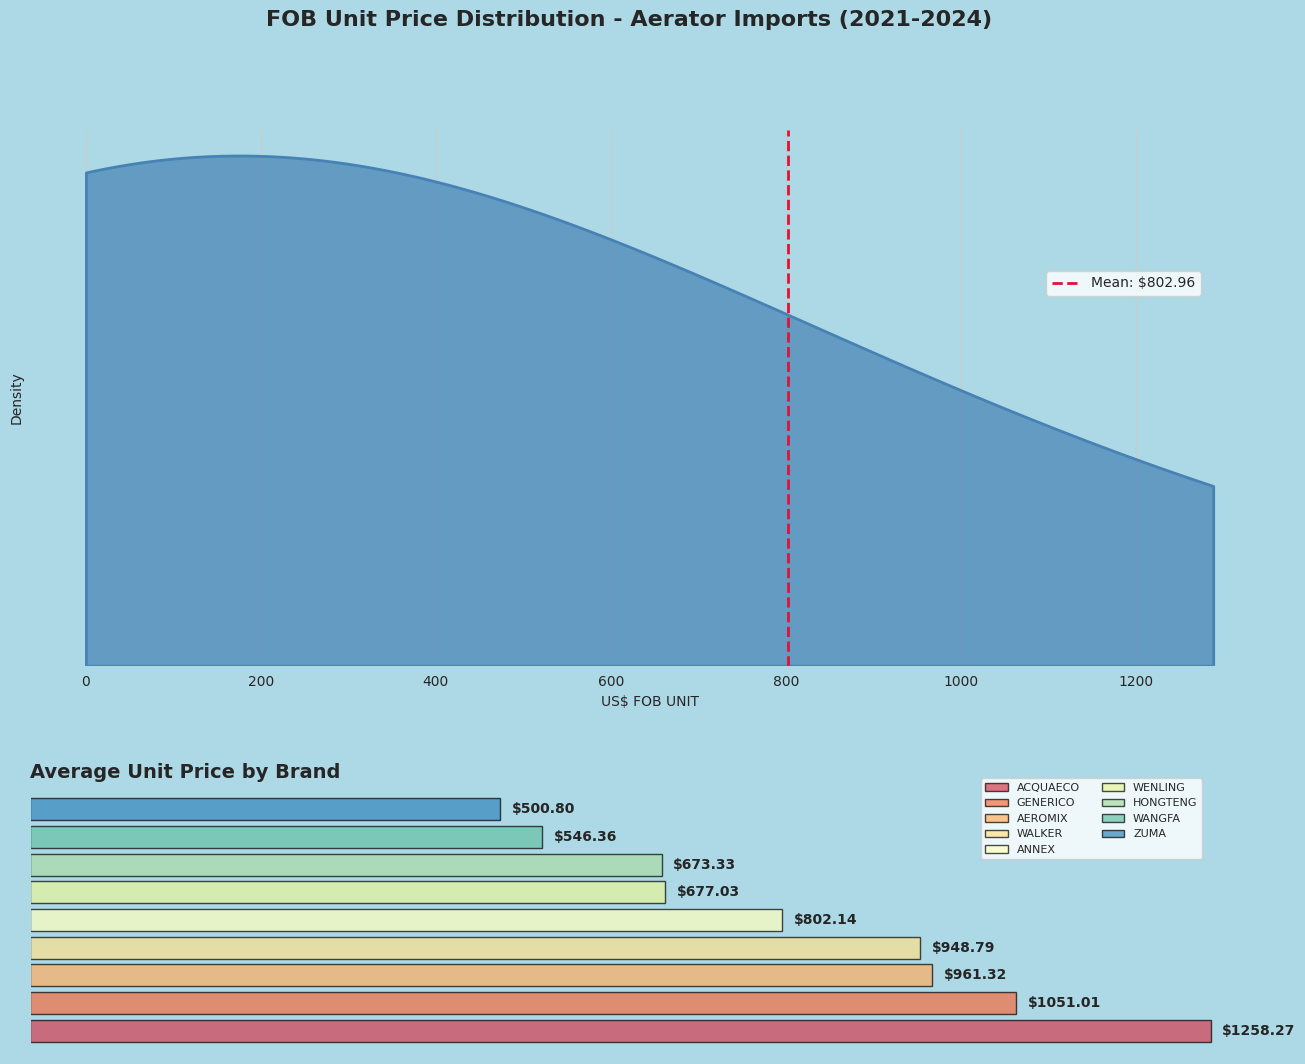

2025-06-03 16:13:17,274 - INFO - Visualizations completed
2025-06-03 16:13:17,274 - INFO - Full analysis pipeline completed



📊 Analysis Summary:
------------------------------
Total Records: 703
Total Columns: 54
Missing Data: 0.00%
Memory Usage: 1.48 MB

🏆 Top 5 Brands:
      Marca  Count  Percentage (%)
0  GENERICO    412           58.61
1   NEOPERL     69            9.82
2      DIVA     21            2.99
3    WALKER     16            2.28
4        FV     14            1.99

💰 Price Statistics:
Mean Price: $802.96
Median Price: $34.30
Price Range: $0.05 - $85250.00

📈 Generated 5 categorical plots
📈 Generated price distribution analysis

✅ Analysis completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from typing import Dict, List, Tuple, Optional
from pathlib import Path

from config import (
    INPUT_DIR,
    YEAR_RANGE,
    DATE_COLUMNS,
    COLUMN_TRANSLATIONS,
    BRAND_MAPPING,
    MODEL_MAPPING,
    PRODUCT_MAPPING,
    ANALYSIS_CONFIG,
    VIZ_CONFIG,
)

# Configure logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)
logger = logging.getLogger(__name__)


class DataLoader:
    """Handles loading and initial processing of aerator import data files."""

    def __init__(
        self, input_dir: str = INPUT_DIR, year_range: range = YEAR_RANGE
    ):
        self.input_dir = Path(input_dir)
        self.year_range = year_range
        self.raw_data: Dict[str, pd.DataFrame] = {}

    def load_all_files(self) -> Dict[str, pd.DataFrame]:
        """Load all aerator data files for the specified year range."""
        logger.info(f"Loading data files from {self.input_dir}")

        for year in self.year_range:
            file_name = f"{year}_aerators"
            file_path = self.input_dir / f"{file_name}.csv"

            try:
                df = pd.read_csv(file_path)
                self.raw_data[file_name] = df
                logger.info(
                    f"Loaded {file_name}: {df.shape[0]} rows × {df.shape[1]} columns"
                )
            except FileNotFoundError:
                logger.error(f"File not found: {file_path}")
            except Exception as e:
                logger.error(f"Error loading {file_path}: {e}")

        return self.raw_data

    def get_common_columns(self) -> List[str]:
        """Find columns present in all datasets."""
        if not self.raw_data:
            raise ValueError("No data loaded. Call load_all_files() first.")

        common_columns = set.intersection(
            *(set(df.columns) for df in self.raw_data.values())
        )
        logger.info(
            f"Found {len(common_columns)} common columns across all datasets"
        )
        return list(common_columns)

    def combine_datasets(self) -> pd.DataFrame:
        """Combine all datasets using only common columns."""
        common_columns = self.get_common_columns()

        combined_data = pd.concat(
            [df[common_columns] for df in self.raw_data.values()],
            ignore_index=True,
        )

        logger.info(
            f"Combined dataset: {combined_data.shape[0]} rows × {combined_data.shape[1]} columns"
        )
        return combined_data

    def get_data_summary(self) -> Dict[str, int]:
        """Get summary statistics for loaded data."""
        if not self.raw_data:
            return {}

        total_records = sum(len(df) for df in self.raw_data.values())
        records_by_year = {year: len(df) for year, df in self.raw_data.items()}

        return {
            "total_records": total_records,
            "records_by_year": records_by_year,
            "total_files": len(self.raw_data),
        }


class DataCleaner:
    """Handles data cleaning and preprocessing operations."""

    def __init__(self):
        self.date_columns = DATE_COLUMNS
        self.column_translations = COLUMN_TRANSLATIONS
        self.brand_mapping = BRAND_MAPPING
        self.model_mapping = MODEL_MAPPING
        self.product_mapping = PRODUCT_MAPPING

    def convert_date_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """Convert date columns to datetime format."""
        df_cleaned = df.copy()
        conversion_results = []

        for col in self.date_columns:
            if col in df_cleaned.columns:
                orig_nulls = df_cleaned[col].isnull().sum()
                df_cleaned[col] = pd.to_datetime(
                    df_cleaned[col], errors="coerce"
                )
                new_nulls = df_cleaned[col].isnull().sum()

                conversion_results.append(
                    {
                        "column": col,
                        "orig_nulls": orig_nulls,
                        "new_nulls": new_nulls,
                        "conversion_errors": new_nulls - orig_nulls,
                    }
                )

        logger.info(f"Converted {len(conversion_results)} date columns")
        return df_cleaned

    def translate_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """Translate column names from Spanish to English."""
        df_translated = df.copy()

        # TEMPORARILY DISABLED: Column translation is causing data misalignment
        # The current COLUMN_TRANSLATIONS list doesn't match the actual column order
        # in the combined dataset, causing data to be mapped to wrong columns

        # if len(self.column_translations) == len(df.columns):
        #     df_translated.columns = self.column_translations
        #     logger.info("Column names translated successfully")
        # else:
        #     logger.warning(
        #         f"Column count mismatch: {len(self.column_translations)} translations "
        #         f"vs {len(df.columns)} columns"
        #     )

        logger.info(
            "Column translation skipped (using original Spanish names)"
        )
        return df_translated

    def standardize_categorical_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """Standardize brand, model, and product data."""
        df_cleaned = df.copy()

        # Columns to clean (using original Spanish names)
        categorical_columns = {
            "MARCA": self.brand_mapping,  # BRAND
            "MODELO MERCADERIA": self.model_mapping,  # MERCHANDISE MODEL
            "DESCRIPCION PRODUCTO COMERCIAL": self.product_mapping,  # COMMERCIAL PRODUCT DESCRIPTION
            "MARCA COMERCIAL": self.brand_mapping,  # COMMERCIAL BRAND
        }

        for col, mapping in categorical_columns.items():
            if col in df_cleaned.columns:
                # Fill NaN values
                df_cleaned[col] = df_cleaned[col].fillna("GENERICO")

                # Apply mapping
                df_cleaned[col] = df_cleaned[col].replace(mapping)

                # Standardize case
                df_cleaned[col] = df_cleaned[col].astype(str).str.upper()

                logger.info(f"Standardized {col}")

        return df_cleaned

    def clean_numeric_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """Clean and convert numeric columns, handling concatenated or invalid data."""
        df_cleaned = df.copy()

        # Define columns that should be numeric (using original Spanish names)
        numeric_columns = [
            "US$ FOB UNIT",  # Unit price in USD
            "CANTIDAD",  # Quantity
            "US$ FOB",  # Total FOB value
            "PESO NETO KG",  # Net weight
            # Note: Some files might have slightly different column names
        ]

        for col in numeric_columns:
            if col in df_cleaned.columns:
                # Convert to string first to handle any data type issues
                df_cleaned[col] = df_cleaned[col].astype(str)

                # Remove any obvious concatenated or invalid entries
                # Keep only entries that look like valid numbers (digits, dots, commas, minus signs)
                def clean_numeric_value(value):
                    if pd.isna(value) or value in ["nan", "NaN", ""]:
                        return np.nan

                    # Convert to string
                    value_str = str(value).strip()

                    # If it's too long, it's likely concatenated data - mark as invalid
                    if len(value_str) > 20:
                        return np.nan

                    # Remove common non-numeric characters but keep decimal separators
                    import re

                    cleaned = re.sub(r"[^\d.,\-]", "", value_str)

                    # Handle empty strings
                    if not cleaned:
                        return np.nan

                    # Try to convert to float
                    try:
                        # Handle comma as decimal separator (common in some locales)
                        if "," in cleaned and "." not in cleaned:
                            cleaned = cleaned.replace(",", ".")
                        elif "," in cleaned and "." in cleaned:
                            # If both comma and dot, assume comma is thousands separator
                            cleaned = cleaned.replace(",", "")

                        return float(cleaned)
                    except (ValueError, TypeError):
                        return np.nan

                # Apply the cleaning function
                df_cleaned[col] = df_cleaned[col].apply(clean_numeric_value)

                # Convert to numeric, coercing errors to NaN
                df_cleaned[col] = pd.to_numeric(
                    df_cleaned[col], errors="coerce"
                )

                logger.info(f"Cleaned numeric column {col}")

        return df_cleaned

    def clean_full_pipeline(self, df: pd.DataFrame) -> pd.DataFrame:
        """Apply the complete cleaning pipeline."""
        logger.info("Starting full data cleaning pipeline")

        # Convert dates
        df_cleaned = self.convert_date_columns(df)

        # Translate columns
        df_cleaned = self.translate_columns(df_cleaned)

        # Standardize categorical data
        df_cleaned = self.standardize_categorical_data(df_cleaned)

        # Clean numeric columns
        df_cleaned = self.clean_numeric_columns(df_cleaned)

        logger.info("Data cleaning pipeline completed")
        return df_cleaned


class DataAnalyzer:
    """Provides data analysis and summary statistics."""

    def __init__(self):
        self.numeric_cols = ANALYSIS_CONFIG["numeric_cols"]
        self.categorical_cols = ANALYSIS_CONFIG["categorical_cols"]
        self.top_n = ANALYSIS_CONFIG["top_n"]

    def get_missing_values_report(self, df: pd.DataFrame) -> pd.DataFrame:
        """Generate a comprehensive missing values report."""
        missing_values = df.isnull().sum()
        missing_values = missing_values[missing_values > 0].sort_values(
            ascending=False
        )

        missing_percent = (missing_values / len(df) * 100).round(2)

        report = pd.DataFrame(
            {
                "Missing Values": missing_values,
                "Percentage (%)": missing_percent,
            }
        )

        logger.info(
            f"Missing values report: {len(report)} columns with missing data"
        )
        return report

    def get_summary_statistics(self, df: pd.DataFrame) -> Dict[str, float]:
        """Calculate summary statistics for the dataset."""
        numeric_df = df.select_dtypes(include=[np.number])

        stats = {
            "total_rows": len(df),
            "total_columns": len(df.columns),
            "missing_cells": df.isnull().sum().sum(),
            "missing_percentage": (df.isnull().sum().sum() / df.size) * 100,
            "memory_usage_mb": df.memory_usage(deep=True).sum() / (1024**2),
            "numeric_columns": len(numeric_df.columns),
            "categorical_columns": len(df.columns) - len(numeric_df.columns),
        }

        return stats

    def get_top_categories(
        self, df: pd.DataFrame, column: str, n: int = None
    ) -> pd.DataFrame:
        """Get top N categories for a given column."""
        if n is None:
            n = self.top_n

        if column not in df.columns:
            raise ValueError(f"Column '{column}' not found in dataframe")

        top_categories = df[column].value_counts().head(n)

        result = pd.DataFrame(
            {
                column.title(): top_categories.index,
                "Count": top_categories.values,
                "Percentage (%)": (
                    top_categories.values / len(df) * 100
                ).round(2),
            }
        )

        return result

    def analyze_price_distribution(
        self, df: pd.DataFrame, price_col: str = "US$ FOB UNIT"
    ) -> Dict[str, float]:
        """Analyze price distribution statistics."""
        if price_col not in df.columns:
            raise ValueError(f"Price column '{price_col}' not found")

        prices = df[price_col].dropna()

        stats = {
            "count": len(prices),
            "mean": prices.mean(),
            "median": prices.median(),
            "std": prices.std(),
            "min": prices.min(),
            "max": prices.max(),
            "q25": prices.quantile(0.25),
            "q75": prices.quantile(0.75),
            "q95": prices.quantile(0.95),
        }

        return stats


class Visualizer:
    """Handles all visualization and plotting operations."""

    def __init__(self):
        self.config = VIZ_CONFIG
        self.numeric_cols = ANALYSIS_CONFIG["numeric_cols"]
        self.categorical_cols = ANALYSIS_CONFIG["categorical_cols"]

        # Set default style
        sns.set_style(self.config["style"])
        plt.rcParams["figure.dpi"] = self.config["dpi"]

    def create_categorical_analysis_plots(
        self, df: pd.DataFrame, figsize: Tuple[int, int] = None
    ) -> List[plt.Figure]:
        """Create dashboard of categorical analysis plots."""
        if figsize is None:
            figsize = self.config["default_figsize"]

        figures = []

        for i, (num_col, cat_col) in enumerate(
            zip(self.numeric_cols, self.categorical_cols)
        ):
            if num_col not in df.columns or cat_col not in df.columns:
                continue

            fig, ax = plt.subplots(1, 1, figsize=figsize)
            self._setup_plot_style(fig, ax)

            # Prepare data
            df_temp = df.copy()
            df_temp[num_col] = pd.to_numeric(df_temp[num_col], errors="coerce")

            grouped_data = (
                df_temp.groupby(cat_col)[num_col]
                .sum()
                .nlargest(10)
                .sort_values(ascending=False)
            )

            if len(grouped_data) == 0 or grouped_data.max() == 0:
                self._plot_no_data(ax, num_col, cat_col)
            else:
                self._create_bar_plot(ax, grouped_data, num_col, cat_col)

            plt.tight_layout()
            figures.append(fig)
            plt.show()

        return figures

    def create_price_distribution_plot(
        self, df: pd.DataFrame, price_col: str = "US$ FOB UNIT"
    ) -> plt.Figure:
        """Create price distribution analysis plot."""
        prices = df[price_col].dropna()

        # Calculate statistics
        mean_price = prices.mean()
        percentile_95 = prices.quantile(0.95)

        # Filter brands for price analysis
        price_range = ANALYSIS_CONFIG["price_filter_range"]
        brand_avg_prices = df.groupby("MARCA")[price_col].mean()
        filtered_brands = brand_avg_prices[
            (brand_avg_prices >= price_range[0])
            & (brand_avg_prices <= price_range[1])
        ].nlargest(10)

        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(
            2,
            1,
            figsize=(16, 12),
            height_ratios=[2, 1],
            gridspec_kw={"hspace": 0.3},
        )

        # Price distribution plot
        sns.kdeplot(
            data=prices,
            fill=True,
            color="steelblue",
            alpha=0.7,
            linewidth=2,
            clip=(0, percentile_95),
            bw_adjust=0.5,
            ax=ax1,
        )

        ax1.axvline(
            mean_price,
            color="crimson",
            linestyle="--",
            linewidth=2,
            label=f"Mean: ${mean_price:.2f}",
        )

        self._setup_plot_style(fig, ax1)
        ax1.set_yticks([])
        ax1.legend(loc="upper right", bbox_to_anchor=(0.95, 0.75))

        # Brand price comparison
        colors = sns.color_palette(
            self.config["color_palette"], len(filtered_brands)
        )
        bars = ax2.barh(
            y=range(len(filtered_brands)),
            width=filtered_brands.values,
            color=colors,
            alpha=0.7,
            edgecolor="black",
            linewidth=1,
        )

        # Add value labels
        for i, (bar, value) in enumerate(zip(bars, filtered_brands.values)):
            ax2.text(
                value + max(filtered_brands) * 0.01,
                i,
                f"${value:.2f}",
                va="center",
                fontsize=10,
                fontweight="bold",
            )

        self._setup_plot_style(fig, ax2)
        ax2.set_yticks([])
        ax2.set_xticks([])
        ax2.grid(axis="x", alpha=0.3, linestyle="--")

        ax2.legend(
            bars,
            filtered_brands.index,
            loc="upper right",
            bbox_to_anchor=(0.95, 1.05),
            fontsize=8,
            ncols=2,
        )

        ax2.set_title(
            "Average Unit Price by Brand",
            fontsize=14,
            fontweight="bold",
            loc="left",
        )

        fig.suptitle(
            "FOB Unit Price Distribution - Aerator Imports (2021-2024)",
            fontsize=16,
            fontweight="bold",
            y=0.98,
        )

        plt.tight_layout()
        plt.show()

        return fig

    def _setup_plot_style(self, fig: plt.Figure, ax: plt.Axes) -> None:
        """Apply consistent styling to plots."""
        fig.patch.set_facecolor(self.config["background_color"])
        ax.set_facecolor(self.config["background_color"])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_color(self.config["background_color"])
        ax.spines["bottom"].set_color(self.config["background_color"])

    def _plot_no_data(self, ax: plt.Axes, num_col: str, cat_col: str) -> None:
        """Plot message when no data is available."""
        ax.text(
            0.5,
            0.5,
            f"No data available for {num_col}",
            ha="center",
            va="center",
            transform=ax.transAxes,
            fontsize=14,
        )
        ax.set_title(
            f"Top 10 {cat_col} ({num_col}) - Aerator Imports (2021-2024)",
            fontsize=14,
            fontweight="bold",
            ha="center",
            pad=20,
        )

    def _create_bar_plot(
        self, ax: plt.Axes, grouped_data: pd.Series, num_col: str, cat_col: str
    ) -> None:
        """Create styled bar plot with data."""
        colors = sns.color_palette(
            self.config["color_palette"], n_colors=len(grouped_data)
        )

        bars = sns.barplot(
            x=grouped_data.index,
            y=grouped_data.values,
            ax=ax,
            edgecolor="black",
            alpha=0.7,
            legend=False,
            width=0.7,
        )

        # Set colors manually
        for bar, color in zip(bars.patches, colors):
            bar.set_facecolor(color)

        # Scale handling
        min_value = (
            grouped_data[grouped_data > 0].min()
            if any(grouped_data > 0)
            else 1
        )
        if grouped_data.max() / min_value > 100:
            ax.set_yscale("symlog")
            ax.set_ylim(min_value * 0.5, grouped_data.max() * 1.1)
        else:
            max_val = grouped_data.max()
            if max_val > 0:
                ax.set_ylim(0, max_val * 1.1)

        # Styling
        ax.set_yticklabels([])
        ax.tick_params(axis="both", which="both", length=0)
        ax.set_title(
            f"Top 10 {cat_col} ({num_col}) - Aerator Imports (2021-2024)",
            fontsize=14,
            fontweight="bold",
            ha="center",
            pad=20,
        )
        ax.set_ylabel("")
        ax.set_xlabel("")

        # Add value labels
        for bar in bars.patches:
            height = bar.get_height()
            if height > 0:
                value_text = self._format_value(height)
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height * 1.01,
                    value_text,
                    ha="center",
                    va="bottom",
                    fontsize=12,
                    fontweight="bold",
                )

        # Legend
        plt.setp(ax.get_xticklabels(), visible=False)
        legend_elements = self._create_legend_elements(grouped_data, colors)
        ax.legend(
            handles=legend_elements,
            loc="center left",
            bbox_to_anchor=(1.05, 0.5),
            ncol=1,
            fontsize=10,
            frameon=False,
        )

        ax.set_xticks(np.arange(len(grouped_data)))
        ax.set_xticklabels(range(1, len(grouped_data) + 1))
        ax.grid(axis="y", linestyle="-", alpha=0.3)

    def _format_value(self, value: float) -> str:
        """Format large numbers with appropriate suffixes."""
        if value > 1000000:
            return f"{value / 1000000:.1f}M"
        elif value > 1000:
            return f"{value / 1000:.0f}K"
        else:
            return f"{value:,.0f}"

    def _create_legend_elements(
        self, grouped_data: pd.Series, colors: List
    ) -> List:
        """Create legend elements for plots."""
        legend_elements = []
        for j, (cat, val) in enumerate(grouped_data.items()):
            if pd.notna(cat):
                display_name = str(cat)
                if len(display_name) > 25:
                    display_name = display_name[:22] + "..."
                legend_elements.append(
                    plt.Rectangle(
                        (0, 0),
                        1,
                        1,
                        fc=colors[j],
                        alpha=0.7,
                        edgecolor="black",
                        label=f"{j + 1}. {display_name}",
                    )
                )
        return legend_elements


class AeratorDataProcessor:
    """Main orchestrator class that coordinates all components."""

    def __init__(self, input_dir: str = INPUT_DIR):
        self.input_dir = input_dir
        self.loader = DataLoader(input_dir)
        self.cleaner = DataCleaner()
        self.analyzer = DataAnalyzer()
        self.visualizer = Visualizer()

        self.raw_data: Optional[Dict[str, pd.DataFrame]] = None
        self.combined_data: Optional[pd.DataFrame] = None
        self.cleaned_data: Optional[pd.DataFrame] = None

    def load_data(self) -> Dict[str, pd.DataFrame]:
        """Load all data files."""
        logger.info("Starting data loading process")
        self.raw_data = self.loader.load_all_files()
        return self.raw_data

    def process_data(self, drop_missing: bool = True) -> pd.DataFrame:
        """Complete data processing pipeline."""
        if self.raw_data is None:
            self.load_data()

        logger.info("Starting data processing pipeline")

        # Combine datasets
        self.combined_data = self.loader.combine_datasets()

        # Clean data
        self.cleaned_data = self.cleaner.clean_full_pipeline(
            self.combined_data
        )

        # Optionally drop rows with missing values
        if drop_missing:
            original_rows = len(self.cleaned_data)
            self.cleaned_data = self.cleaned_data.dropna()
            dropped_rows = original_rows - len(self.cleaned_data)
            logger.info(
                f"Dropped {dropped_rows} rows with missing values ({dropped_rows / original_rows:.2%})"
            )

        logger.info("Data processing pipeline completed")
        return self.cleaned_data

    def analyze_data(self) -> Dict[str, pd.DataFrame]:
        """Perform comprehensive data analysis."""
        if self.cleaned_data is None:
            raise ValueError(
                "No cleaned data available. Run process_data() first."
            )

        logger.info("Starting data analysis")

        results = {
            "summary_stats": self.analyzer.get_summary_statistics(
                self.cleaned_data
            ),
            "missing_values": self.analyzer.get_missing_values_report(
                self.cleaned_data
            ),
            "top_brands": self.analyzer.get_top_categories(
                self.cleaned_data,
                "MARCA",  # BRAND in Spanish
            ),
            "top_models": self.analyzer.get_top_categories(
                self.cleaned_data,
                "MODELO MERCADERIA",  # MERCHANDISE MODEL in Spanish
            ),
            "top_countries": self.analyzer.get_top_categories(
                self.cleaned_data,
                "PAIS DE PROCEDENCIA",  # COUNTRY OF ORIGIN in Spanish
            ),
            "price_stats": self.analyzer.analyze_price_distribution(
                self.cleaned_data
            ),
        }

        logger.info("Data analysis completed")
        return results

    def create_visualizations(self) -> Dict[str, List[plt.Figure]]:
        """Generate all visualizations."""
        if self.cleaned_data is None:
            raise ValueError(
                "No cleaned data available. Run process_data() first."
            )

        logger.info("Creating visualizations")

        visualizations = {
            "categorical_plots": self.visualizer.create_categorical_analysis_plots(
                self.cleaned_data
            ),
            "price_distribution": [
                self.visualizer.create_price_distribution_plot(
                    self.cleaned_data
                )
            ],
        }

        logger.info("Visualizations completed")
        return visualizations

    def run_full_analysis(
        self, drop_missing: bool = True
    ) -> Tuple[pd.DataFrame, Dict, Dict]:
        """Run the complete analysis pipeline."""
        logger.info("Starting full analysis pipeline")

        # Process data
        cleaned_data = self.process_data(drop_missing=drop_missing)

        # Analyze data
        analysis_results = self.analyze_data()

        # Create visualizations
        visualizations = self.create_visualizations()

        logger.info("Full analysis pipeline completed")

        return cleaned_data, analysis_results, visualizations


def main():
    """Demonstration of the modular aerator data analyzer."""
    print("🔄 Aerator Data Analysis - Modular Version")
    print("=" * 50)

    try:
        # Initialize processor
        processor = AeratorDataProcessor()

        # Run full analysis
        cleaned_data, analysis_results, visualizations = (
            processor.run_full_analysis()
        )

        # Print summary results
        print("\n📊 Analysis Summary:")
        print("-" * 30)

        stats = analysis_results["summary_stats"]
        print(f"Total Records: {stats['total_rows']:,}")
        print(f"Total Columns: {stats['total_columns']}")
        print(f"Missing Data: {stats['missing_percentage']:.2f}%")
        print(f"Memory Usage: {stats['memory_usage_mb']:.2f} MB")

        print("\n🏆 Top 5 Brands:")
        print(analysis_results["top_brands"].head())

        print("\n💰 Price Statistics:")
        price_stats = analysis_results["price_stats"]
        print(f"Mean Price: ${price_stats['mean']:.2f}")
        print(f"Median Price: ${price_stats['median']:.2f}")
        print(
            f"Price Range: ${price_stats['min']:.2f} - ${price_stats['max']:.2f}"
        )

        print(
            f"\n📈 Generated {len(visualizations['categorical_plots'])} categorical plots"
        )
        print("📈 Generated price distribution analysis")

        print("\n✅ Analysis completed successfully!")

    except Exception as e:
        logger.error(f"Analysis failed: {e}")
        print(f"❌ Error: {e}")


main()
